<a href="https://colab.research.google.com/github/giulianna-ellen/IA---2025/blob/main/prova2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importação das bibliotecas necessárias
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# --- 1. Importação das bibliotecas e carregamento do dataset ---

print("Carregando o dataset CIFAR-10...")
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
print("Dataset CIFAR-10 carregado com sucesso!")

Carregando o dataset CIFAR-10...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Dataset CIFAR-10 carregado com sucesso!


In [3]:
# Verificando a forma dos dados
print(f"Forma das imagens de treino: {train_images.shape}")
print(f"Forma dos rótulos de treino: {train_labels.shape}")
print(f"Forma das imagens de teste: {test_images.shape}")
print(f"Forma dos rótulos de teste: {test_labels.shape}")

# Definindo os nomes das classes (para visualização e entendimento)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Forma das imagens de treino: (50000, 32, 32, 3)
Forma dos rótulos de treino: (50000, 1)
Forma das imagens de teste: (10000, 32, 32, 3)
Forma dos rótulos de teste: (10000, 1)


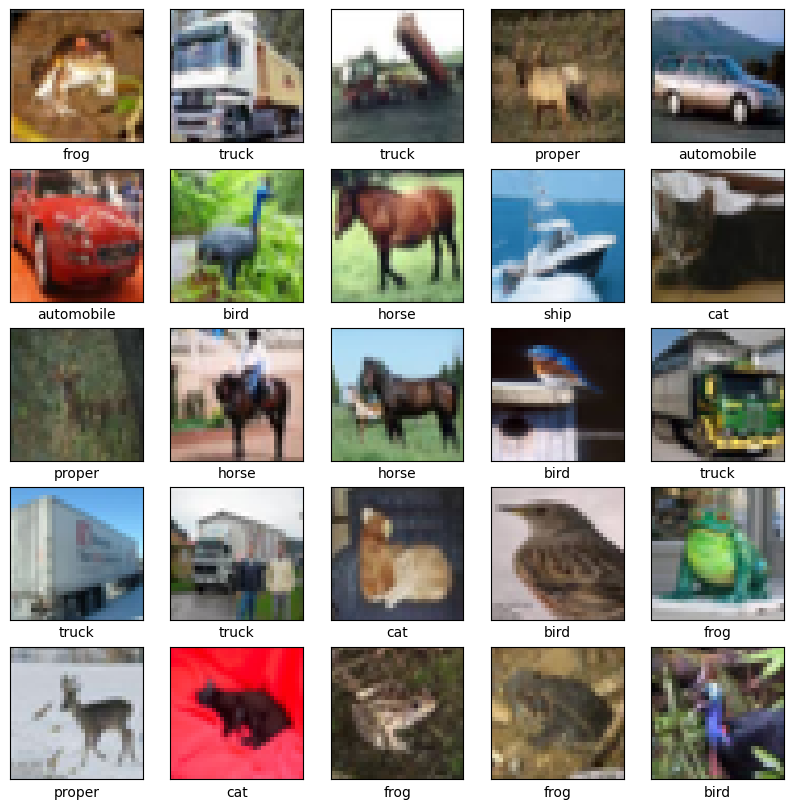

In [4]:
# Exemplo de visualização de algumas imagens
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # Os rótulos CIFAR-10 são arrays de 2D, precisamos pegar o primeiro elemento
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [5]:
 #--- 2. Normalização dos pixels para o intervalo [0,1] ---

print("Normalizando os valores dos pixels para o intervalo [0, 1]...")
train_images, test_images = train_images / 255.0, test_images / 255.0
print("Normalização concluída!")

Normalizando os valores dos pixels para o intervalo [0, 1]...
Normalização concluída!


In [6]:
# --- 3. Definição de uma CNN com pelo menos três camadas Conv2D, camadas de pooling, Flatten, e camadas densas com dropout ---

print("Definindo a arquitetura da CNN...")
model = models.Sequential()

# Camadas Convolucionais e de Pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization()) # Adicionando Batch Normalization
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization()) # Adicionando Batch Normalization
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu')) # Terceira camada Conv2D
model.add(layers.BatchNormalization()) # Adicionando Batch Normalization
model.add(layers.MaxPooling2D((2, 2)))

# Camada Flatten para converter a saída 3D em 1D
model.add(layers.Flatten())

# Camadas Densas (Fully Connected) com Dropout
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)) # Dropout para regularização

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3)) # Outra camada de Dropout

model.add(layers.Dense(10)) # Camada de saída com 10 neurônios para as 10 classes

# Exibindo o resumo do modelo
model.summary()
print("Arquitetura da CNN definida com sucesso!")

Definindo a arquitetura da CNN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 168,714 (659.04 KB)

 Trainable params: 168,266 (657.29 KB)

 Non-trainable params: 448 (1.75 KB)

Arquitetura da CNN definida com sucesso!


In [7]:
# --- 4. Compilação do modelo usando otimizador Adam e sparse_categorical_crossentropy como função de perda ---

print("Compilando o modelo...")
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print("Modelo compilado com sucesso!")


Compilando o modelo...
Modelo compilado com sucesso!


In [14]:
# --- 5. Treinamento por um número razoável de épocas (por exemplo, 20), com divisão de validação ---

EPOCHS = 10
print(f"Iniciando o treinamento do modelo por {EPOCHS} épocas...")
history = model.fit(train_images, train_labels, epochs=EPOCHS,
                    validation_data=(test_images, test_labels))
print("Treinamento do modelo concluído!")


Iniciando o treinamento do modelo por 10 épocas...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.8283 - loss: 0.5187 - val_accuracy: 0.7405 - val_loss: 0.8443
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 74ms/step - accuracy: 0.8337 - loss: 0.4967 - val_accuracy: 0.7493 - val_loss: 0.8205
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 74ms/step - accuracy: 0.8395 - loss: 0.4837 - val_accuracy: 0.7081 - val_loss: 0.9679
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 78ms/step - accuracy: 0.8470 - loss: 0.4631 - val_accuracy: 0.7163 - val_loss: 0.9385
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 79ms/step - accuracy: 0.8492 - loss: 0.4541 - val_accuracy: 0.7397 - val_loss: 0.8810
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 74ms/step - accuracy: 0.8561 - loss: 0.4379 - val_accuracy: 0.7342 - val_loss: 0.9271
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 76ms/step - accuracy: 0.8609 - loss: 0.4247 - val_accuracy: 0.7269 - val_loss: 0.9589
Epoch 8/10
1563/15

In [10]:
# --- 6. Avaliação da acurácia no conjunto de teste ---

print("Avaliando o modelo no conjunto de teste...")
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'\nAcurácia no conjunto de teste: {test_acc*100:.2f}%')
print(f'Perda no conjunto de teste: {test_loss:.4f}')
print("Avaliação concluída!")

Avaliando o modelo no conjunto de teste...
313/313 - 6s - 18ms/step - accuracy: 0.7318 - loss: 0.8157

Acurácia no conjunto de teste: 73.18%
Perda no conjunto de teste: 0.8157
Avaliação concluída!


Plotando as curvas de acurácia e perda...


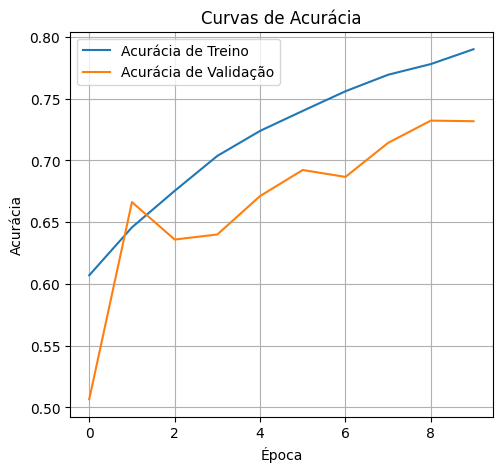

In [11]:
# --- 7. Plotagem das curvas de acurácia e perda ao longo das épocas ---

print("Plotando as curvas de acurácia e perda...")
plt.figure(figsize=(12, 5))

# Plot da acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.title('Curvas de Acurácia')
plt.legend()
plt.grid(True)

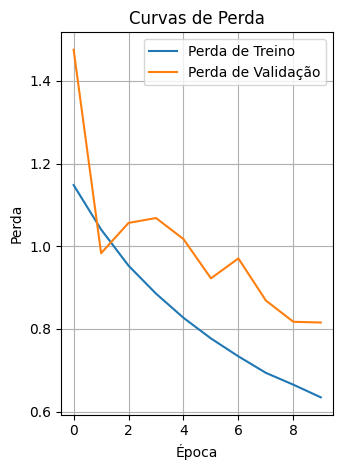

Plotagem das curvas concluída!


In [12]:
# Plot da perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Curvas de Perda')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
print("Plotagem das curvas concluída!")


--- Realizando Inferência em uma Imagem de Teste Aleatória ---
Realizando inferência para a imagem de índice: 1657
Rótulo verdadeiro: dog
Classe predita: dog


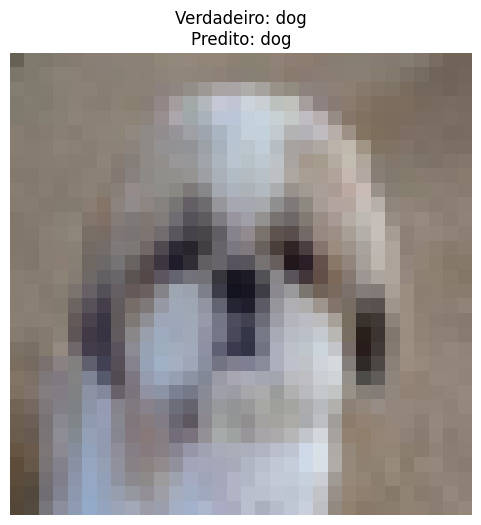

Inferência concluída e visualizada.


In [15]:
# --- 8. Realizando a Inferência em uma imagem que a rede não conheceu ---

print("\n--- Realizando Inferência em uma Imagem de Teste Aleatória ---")

# 1. Escolhe uma imagem de teste aleatória
# Porquê: Queremos testar o modelo em uma imagem que ele não 'decorou' durante o treinamento.
# O conjunto 'test_images' é o ideal para isso, pois foi mantido separado.
index_da_imagem = np.random.randint(0, len(test_images))
imagem_para_inferencia = test_images[index_da_imagem] # Pega os dados da imagem
rotulo_verdadeiro = test_labels[index_da_imagem][0]   # Pega o rótulo verdadeiro para comparação

# Certifique-se de que class_names esteja correto:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Realizando inferência para a imagem de índice: {index_da_imagem}")
print(f"Rótulo verdadeiro: {class_names[rotulo_verdadeiro]}")

# 2. Prepara a imagem para o modelo
# Porquê: Modelos Keras esperam que a entrada seja um 'batch' (lote) de imagens,
# mesmo que você esteja predizendo apenas uma. Adicionamos uma dimensão extra
# para simular um lote de tamanho 1.
imagem_batch = np.expand_dims(imagem_para_inferencia, axis=0) # Transforma (32,32,3) em (1,32,32,3)

# 3. Faz a predição usando o modelo treinado
# Porquê: model.predict() é a função Keras para obter as saídas do modelo para uma dada entrada.
# Ele passa a imagem por todas as camadas da CNN.
predictions = model.predict(imagem_batch, verbose=0) # verbose=0 evita mostrar a barra de progresso

# 4. Converte as saídas brutas (logits) em probabilidades
# Porquê: A última camada do nosso modelo retorna 'logits' (números brutos).
# Para interpretá-los como probabilidades (0 a 1, somando 1), aplicamos a função softmax.
softmax_predictions = tf.nn.softmax(predictions[0]) # predictions[0] pois é um lote de 1 imagem

# 5. Descobre qual classe tem a maior probabilidade
# Porquê: Queremos saber qual classe o modelo considera mais provável.
# np.argmax retorna o índice do maior valor no array de probabilidades.
predicted_class_index = np.argmax(softmax_predictions)
predicted_class_name = class_names[predicted_class_index] # Converte o índice em nome da classe

print(f"Classe predita: {predicted_class_name}")
# print(f"Probabilidades por classe: {softmax_predictions.numpy()}") # Opcional: ver todas as probs

# 6. Visualiza a imagem e a predição
# Porquê: Para ver visualmente se o modelo acertou ou errou, e qual era a imagem.
plt.figure(figsize=(6, 6))
plt.imshow(imagem_para_inferencia)
plt.title(f"Verdadeiro: {class_names[rotulo_verdadeiro]}\nPredito: {predicted_class_name}")
plt.axis('off') # Remove os eixos
plt.show()
print("Inferência concluída e visualizada.")